In [63]:
# pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import *
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [65]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


y["Diagnosis"] = y["Diagnosis"].map({"M": 1, "B": 0})
y = y["Diagnosis"].values.squeeze()

print("showing X: ")
print(X)
print("showing y: ")
print(y)

showing X: 
     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.147

/var/folders/4h/nfpp_rrs33b40rxmf5w4r77r0000gn/T/ipykernel_41381/3643038210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Diagnosis"] = y["Diagnosis"].map({"M": 1, "B": 0})


In [ ]:
# this error is okay, if using .loc syntax it seems to break the model predict function

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



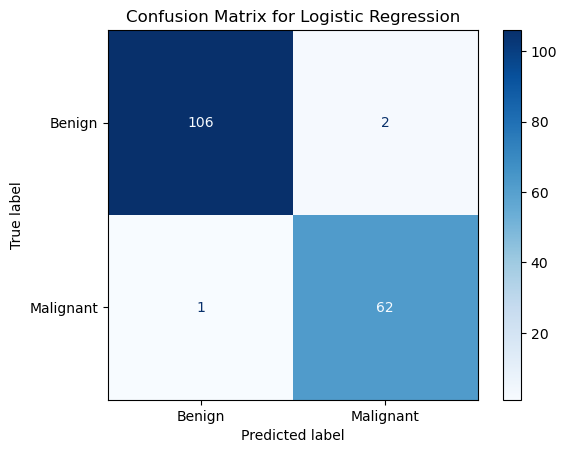

In [67]:
# using ratios and random selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

SVM Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



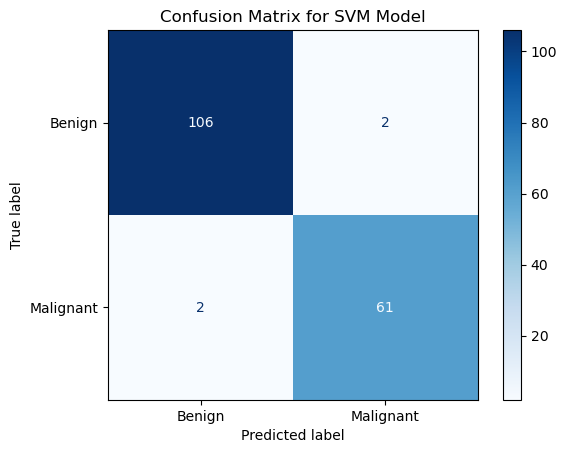

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)   
                
print(f"SVM Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix for SVM Model")
plt.show()

In [71]:
# same two models again but with loo cross vailadation

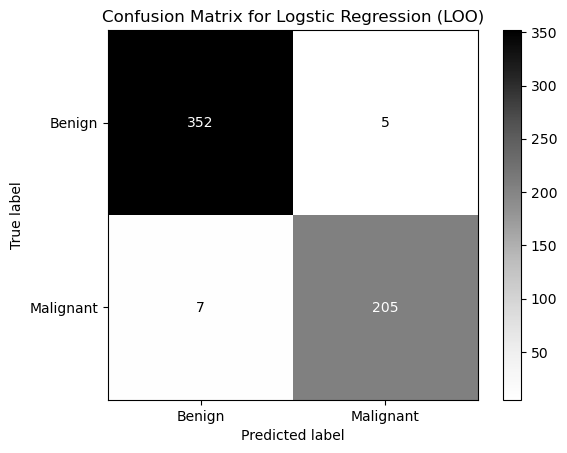


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       357
           1       0.98      0.97      0.97       212

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



In [73]:
loo = LeaveOneOut()

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(C=1, random_state=42, max_iter=1000, class_weight={0: 1, 1: 1}))
])

y_pred_lr = cross_val_predict(pipeline_lr, X, y, cv=loo)

cm = confusion_matrix(y, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Greys")
plt.title("Confusion Matrix for Logstic Regression (LOO)")
plt.show()

print("\nClassification Report:\n", classification_report(y, y_pred_lr))

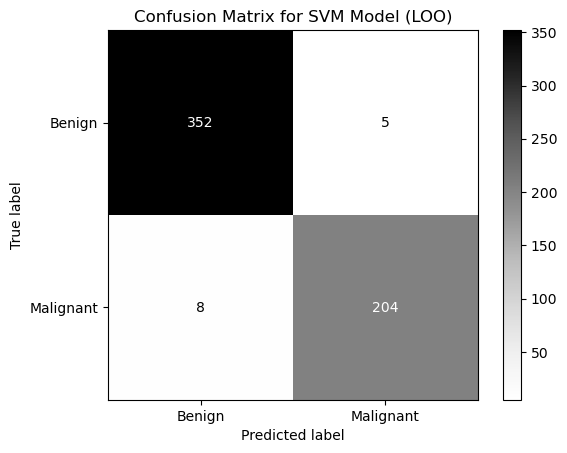


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       357
           1       0.98      0.96      0.97       212

    accuracy                           0.98       569
   macro avg       0.98      0.97      0.98       569
weighted avg       0.98      0.98      0.98       569



In [74]:
loo = LeaveOneOut()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM', SVC(C=1, random_state=42, max_iter=1000, class_weight={0: 1, 1: 1}))
])

y_pred_svm = cross_val_predict(pipeline, X, y, cv=loo)

cm = confusion_matrix(y, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Greys")
plt.title("Confusion Matrix for SVM Model (LOO)")
plt.show()

print("\nClassification Report:\n", classification_report(y, y_pred_svm))

In [75]:
# improve the overall functionallity of Logistic Regression LOO model.

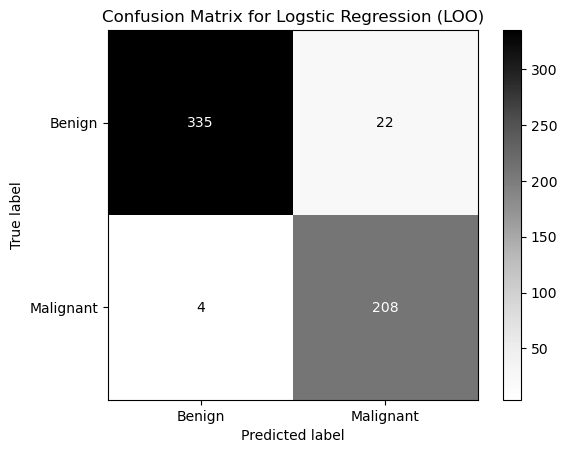


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       357
           1       0.90      0.98      0.94       212

    accuracy                           0.95       569
   macro avg       0.95      0.96      0.95       569
weighted avg       0.96      0.95      0.95       569



In [76]:
# using only the regularisation stregnth and changing class imbalance
loo = LeaveOneOut()

pipeline_lr_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(C=0.17, random_state=42, max_iter=1000, class_weight={0: 0.2, 1: 1}))
])

y_pred_lr_tuned = cross_val_predict(pipeline_lr_tuned, X, y, cv=loo)

cm = confusion_matrix(y, y_pred_lr_tuned)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Greys")
plt.title("Confusion Matrix for Logstic Regression (LOO)")
plt.show()

print("\nClassification Report:\n", classification_report(y, y_pred_lr_tuned))

In [77]:
### ALERT!!!

# The below code changes the solver and regularisation method
# this causes a large slowdown when training this model
# it took approx 2 minutes at most to run on my machine

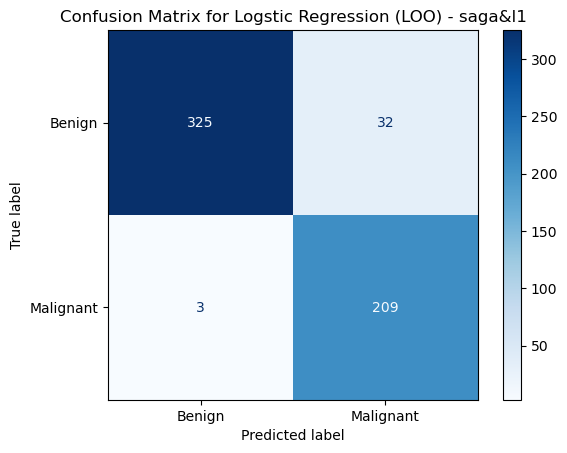


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       357
           1       0.87      0.99      0.92       212

    accuracy                           0.94       569
   macro avg       0.93      0.95      0.94       569
weighted avg       0.94      0.94      0.94       569



In [43]:
loo = LeaveOneOut()

pipeline_lr_tuned = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(solver="saga", penalty="l1", C=0.17, random_state=42, max_iter=10000, class_weight={0: 0.2, 1: 1}))
])

y_pred_lr_tuned = cross_val_predict(pipeline_lr_tuned, X, y, cv=loo)

cm = confusion_matrix(y, y_pred_lr_tuned)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Logstic Regression (LOO) - saga&l1")
plt.show()

print("\nClassification Report:\n", classification_report(y, y_pred_lr_tuned))